In [1]:
# Import class
import Obtainstockdata_final 
from Obtainstockdata_final import *

# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image

from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

In [2]:
# import the dataframe

df = pd.read_csv("final_df.csv")

In [3]:
df.head(5)

,Unnamed: 0,name,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
0,0,Hon. Donald Sternoff Beyer,joint,sale_full,"$15,001 - $50,000",TGT,2022-02-28,3.604143,9.430846,16.804320
1,0,Hon. Donald Sternoff Beyer,joint,sale_full,"$1,001 - $15,000",V,2022-02-28,-8.981116,1.068854,0.397930
2,0,Hon. Donald Sternoff Beyer,joint,sale_full,"$1,001 - $15,000",VZ,2022-02-28,-1.173835,-4.453145,0.953625
3,0,Hon. Donald Sternoff Beyer,joint,sale_full,"$15,001 - $50,000",ROP,2022-02-28,-3.549606,3.935555,7.712189
4,0,Hon. Donald Sternoff Beyer,joint,sale_full,"$15,001 - $50,000",UNH,2022-02-28,1.771263,8.127890,15.068326


#### Filter by individual groupby name, ticker, Date

Find Sells

In [4]:
# Find all sells
congress_name = 'Hon. Brian Mast'
ticker = 'TLRY'

df_name = df.loc[(df['name'] == congress_name) & ((df['transaction'] == 'sale_full') |
                                                  (df['transaction'] == 'Sale (Full)') |
                                                 (df['transaction'] == 'sale_partial') |
                                                 (df['transaction'] == 'Sale (Partial)')) &
                (df['ticker'] == ticker)]

In [5]:
pd.set_option("display.max_rows", None)

df_name.groupby(['name', 'amount_invest', 'ticker', 'transaction', 'Date']).count()

,,,,,Unnamed: 0,owner,10_day_change,20_day_change,30_day_change
name,amount_invest,ticker,transaction,Date,,,,,
Hon. Brian Mast,"$15,001 - $50,000",TLRY,sale_partial,2021-02-09,2,0,2,2,2


Find All Buys

In [64]:
# Find all buys
congress_name = 'Thomas H Tuberville'
ticker = 'SSYS'

df_name = df.loc[(df['name'] == congress_name) & ((df['transaction'] == 'purchase') |
                                                  (df['transaction'] == 'Purchase')) &
                 (df['ticker'] == ticker)]

In [65]:
pd.set_option("display.max_rows", None)

df_name.groupby(['name', 'amount_invest', 'ticker', 'transaction', 'Date']).count()

Unnamed: 0  \
name                amount_invest      ticker transaction Date                     
Thomas H Tuberville $1,001 - $15,000   SSYS   Purchase    2021-08-18           1   
                    $15,001 - $50,000  SSYS   Purchase    2021-12-13           1   
                    $50,001 - $100,000 SSYS   Purchase    2021-09-20           1   

                                                                      owner  \
name                amount_invest      ticker transaction Date                
Thomas H Tuberville $1,001 - $15,000   SSYS   Purchase    2021-08-18      1   
                    $15,001 - $50,000  SSYS   Purchase    2021-12-13      1   
                    $50,001 - $100,000 SSYS   Purchase    2021-09-20      1   

                                                                      10_day_change  \
name                amount_invest      ticker transaction Date                        
Thomas H Tuberville $1,001 - $15,000   SSYS   Purchase    2021-08-18              1   
                    $15,001 - $50,000  SSYS   Purchase    2021-12-13              1   
                    $50,001 - $100,000 SSYS   Purchase    2021-09-20              1   

                                                                      20_day_change  \
name                amount_invest      ticker transaction Date                        
Thomas H Tuberville $1,001 - $15,000   SSYS   Purchase    2021-08-18              1   
                    $15,001 - $50,000  SSYS   Purchase    2021-12-13              1   
                    $50,001 - $100,000 SSYS   Purchase    2021-09-20              1   

                                                                      30_day_change  
name                amount_invest      ticker transaction Date                       
Thomas H Tuberville $1,001 - $15,000   SSYS   Purchase    2021-08-18              1  
                    $15,001 - $50,000  SSYS   Purchase    2021-12-13              1  
                    $50,001 - $100,000 SSYS   Purchase    2021-09-20              1

### Preprocess Data

In [8]:
# Perform one hot encoding
df_encoded = pd.get_dummies(df, columns=['owner', 'transaction', 'amount_invest',])
df_encoded = df_encoded.drop(columns = ['name', 'Unnamed: 0', 'Date', 'ticker'], axis = 1)
df_encoded.head(5)

,10_day_change,20_day_change,30_day_change,owner_--,owner_Child,owner_Joint,owner_Self,owner_Spouse,owner_dependent,owner_joint,...,"amount_invest_$1,000,001 - $5,000,000","amount_invest_$1,001 -","amount_invest_$1,001 - $15,000","amount_invest_$100,001 - $250,000","amount_invest_$15,000 - $50,000","amount_invest_$15,001 - $50,000","amount_invest_$250,001 - $500,000","amount_invest_$5,000,001 - $25,000,000","amount_invest_$50,001 - $100,000","amount_invest_$500,001 - $1,000,000"
0,3.604143,9.430846,16.804320,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-8.981116,1.068854,0.397930,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,-1.173835,-4.453145,0.953625,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,-3.549606,3.935555,7.712189,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1.771263,8.127890,15.068326,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Obtain only the 10, 20 and 30 day change for for the LOF results

In [9]:
# Only the continuous variables for the LOF

df_encoded_2 = df_encoded.loc[:, ['10_day_change', '20_day_change', '30_day_change']]
df_encoded_2.head(5)

,10_day_change,20_day_change,30_day_change
0,3.604143,9.430846,16.804320
1,-8.981116,1.068854,0.397930
2,-1.173835,-4.453145,0.953625
3,-3.549606,3.935555,7.712189
4,1.771263,8.127890,15.068326


In [10]:
ss = StandardScaler()
scaled_features= ss.fit_transform(df_encoded)

# For changes only
scaled_features_2 = ss.fit_transform(df_encoded_2)

In [11]:
#mm = MinMaxScaler(feature_range=(0, 1))

In [12]:
#scaled_features2 = mm.fit_transform(df_encoded)

### Clustering

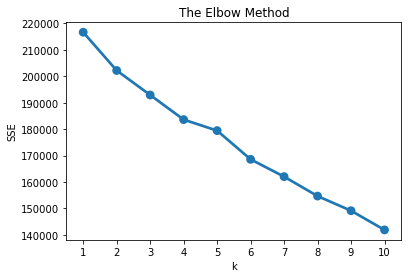

In [13]:
# Determine the number of clusters using the knee method. 
determine_knee(scaled_features)

The cluster sizes are:
0    4216
1    1774
2     781
Name: owner_dependent, dtype: int64


The clusters are:
         10_day_change  20_day_change  30_day_change  owner_--  owner_Child  \
Cluster                                                                       
0            -0.020507      -0.009231      -0.001628  0.002563    -0.054429   
1             0.076143       0.038704       0.020867  0.028690    -0.054429   
2            -0.062256      -0.038083      -0.038610 -0.079004     0.417452   

         owner_Joint  owner_Self  owner_Spouse  owner_dependent  owner_joint  \
Cluster                                                                        
0          -0.229576   -0.107954     -0.231353         0.041048     0.126035   
1          -0.229576   -0.107954     -0.231353        -0.014074    -0.017822   
2           1.760770    0.827966      1.774397        -0.189617    -0.639883   

         ...  transaction_Exchange  transaction_Purchase  \
Cluster  ...                      

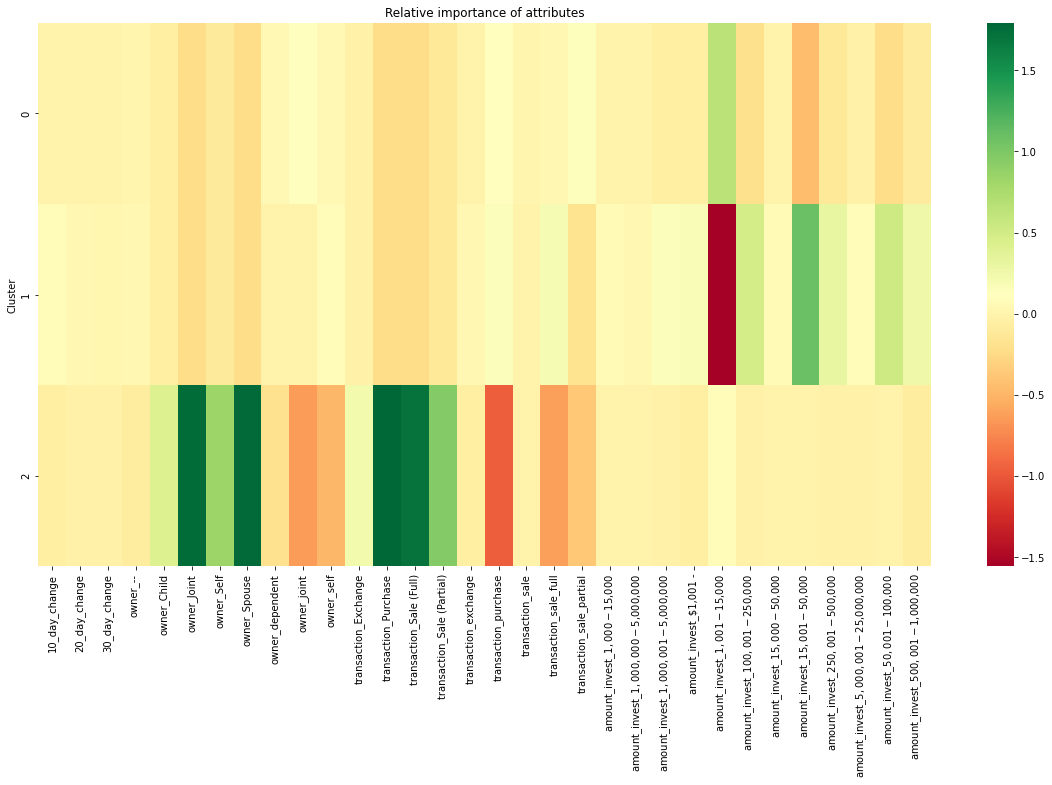

In [14]:
# Perform Kmeans on the data
km_cluster = clustering(3, scaled_features, df_encoded.columns)

In [15]:
# Calculate the silhouette score
calc_silhouette(3, km_cluster, scaled_features)

The silhouette score for 3 clusters is: 0.22158584183976945.


### Plots

For plotting in 2-D.  Use PCA

In [16]:
pca = PCA(2)

In [17]:
# Convert to PCs for K-Means
data1 = pca.fit_transform(scaled_features)

In [18]:
# Convert to PCs for LOF
data2 = pca.fit_transform(df_encoded_2)

#### KMeans plot

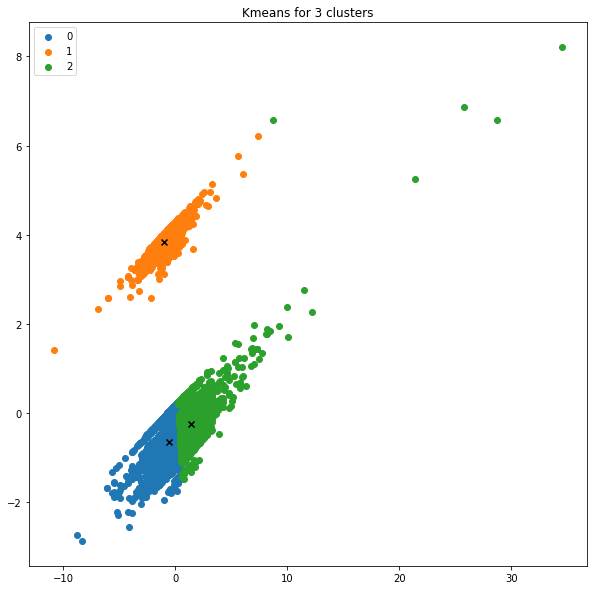

In [19]:
# Reference:https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6

number_clusters = 3
model = KMeans(n_clusters = number_clusters, 
               random_state =123, 
               n_init = 500, 
               max_iter = 300)
label = model.fit_predict(data1)
plt.figure(figsize=(10, 10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data1[label == i, 0], data1[label ==i, 1], label = i)
    

centers = np.array(model.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color = 'k')
plt.title(f"Kmeans for {number_clusters} clusters")
plt.legend()
plt.show()

#### Local Outlier Factor Plot

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html
https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf#:~:text=Anomaly%20Detection%20Techniques%20in%20Python%201%20Local%20Outlier,dataset.%20...%203%20One-Class%20Support%20Vector%20Machines.%20
https://medium.com/mlpoint/local-outlier-factor-a-way-to-detect-outliers-dde335d77e1a

Determine the kk value to use.

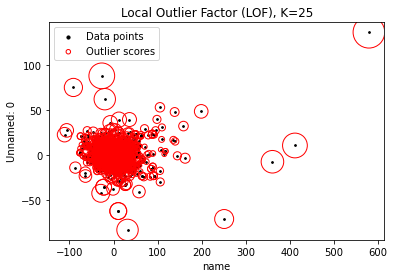

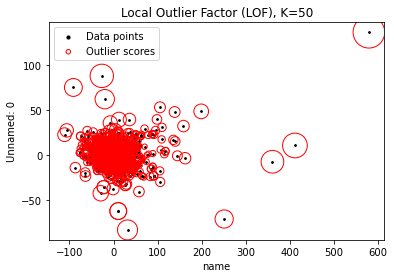

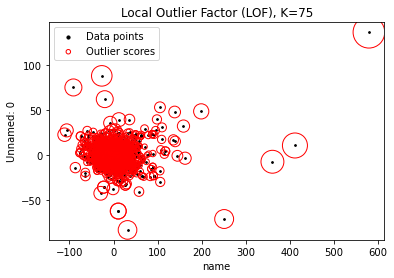

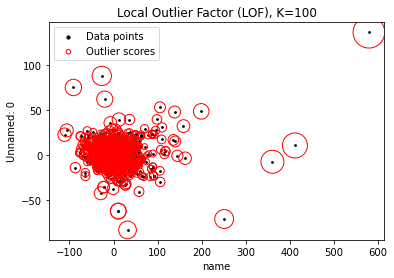

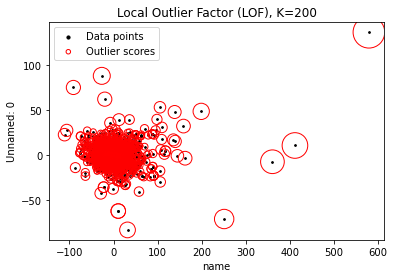

In [20]:
# Convert PCs to dataframe
data2_df = pd.DataFrame(data2)

def LOF_plot(k):

    var1,var2=0,1
    clf = LocalOutlierFactor(n_neighbors=k, contamination=.01)
    y_pred = clf.fit_predict(data2_df)
    LOF_Scores = clf.negative_outlier_factor_
    
    

    plt.title('Local Outlier Factor (LOF), K={}'.format(k))
    plt.scatter(data2_df.iloc[:, var1], data2_df.iloc[:, var2], color='k', s=3., label='Data points')
    radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
    plt.scatter(data2_df.iloc[:, var1], data2_df.iloc[:, var2], s=1000 * radius, edgecolors='r',
    facecolors='none', label='Outlier scores')
    
    
    plt.axis('tight')
    plt.ylabel('{}'.format(df.columns[var1]))
    plt.xlabel('{}'.format(df.columns[var2]))
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.show()
    
LOF_plot(25)
LOF_plot(50)
LOF_plot(75)
LOF_plot(100)
LOF_plot(200)

In [21]:
lof = LocalOutlierFactor(n_neighbors=100, contamination=.04, metric='minkowski')

In [22]:
df_encoded_2 = np.array(df_encoded_2)
y_pred = lof.fit_predict(df_encoded_2)
lofs_index = np.where(y_pred==-1)


findfont: Font family ['variant'] not found. Falling back to DejaVu Sans.


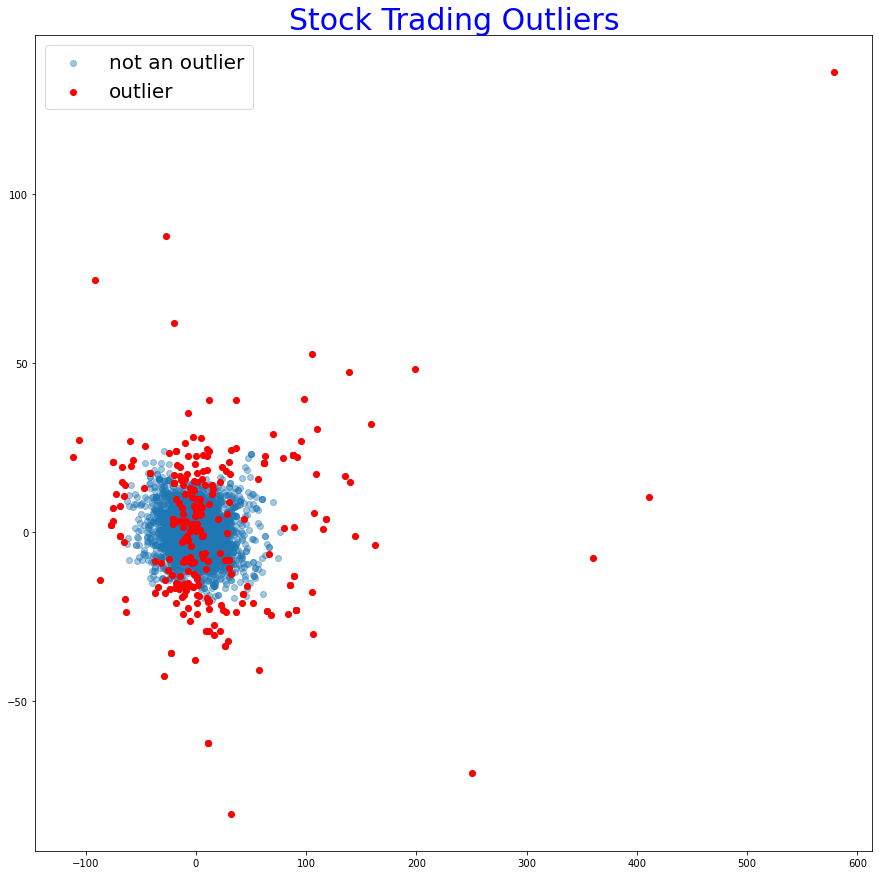

In [23]:
# Plot the PCs data2 using values obtained from LOF
values = data2[lofs_index]

plt.figure(figsize=(15, 15))
normal = plt.scatter(data2[:,0], data2[:,1], alpha=0.4, label = 'not an outlier')
outlier = plt.scatter(values[:,0],values[:,1], color='r', label = 'outlier')

font1 = {'family':'variant','color':'blue','size':20}

plt.title('Stock Trading Outliers', size = 30, fontdict=font1)
plt.legend(handles=[normal,outlier], fontsize = 20)

plt.show()

Obtain the actual outliier indices

In [24]:
#lofs_index

In [25]:
#pd.set_option("display.max_rows", 100)
#df_outliers = df.iloc[lofs_index]
#df_outliers = df_outliers.drop(columns = ['Unnamed: 0'], axis = 1)
#df_outliers

In [26]:
# Group by congressman and the count

#df_count = df_outliers.groupby('name').count()
#df_count.head(10)

In [27]:
#df_outliers.loc[:, 'transaction'].unique()

#### DBSCAN

Plot using PCA

In [28]:
db = DBSCAN(eps=0.8, min_samples=6)
db.fit(scaled_features_2)
y_pred = db.fit_predict(scaled_features_2)

In [29]:
# Calculate silhouette score
scaled_features_df = pd.DataFrame(scaled_features_2)
scaled_features_df['labels'] = y_pred
metrics.silhouette_score(scaled_features_df, scaled_features_df['labels'])

0.7735309704841836

In [30]:
# Add the predictions to the PCA np array
y_pred2 = np.expand_dims(y_pred, axis=1)
data3 = np.append(data2, y_pred2, axis=1)
data3


array([[15.47353555,  3.16276149,  0.        ],
       [-5.33819827,  7.28022144,  0.        ],
       [-6.07608776,  2.06229824,  0.        ],
       ...,
       [60.33544442, -7.64143514,  0.        ],
       [10.28106778,  0.52409565,  0.        ],
       [47.15157839, 11.81523486,  0.        ]])

Text(0.5, 1.0, 'DBSCAN Clusters')

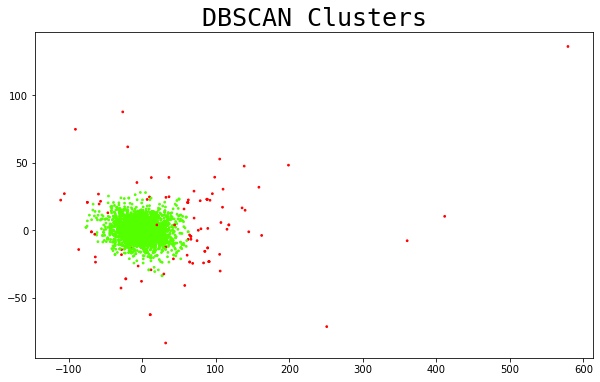

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(data3[:,0], data3[:,1], c=data3[:,2],  cmap='prism', s=3 )

plt.title("DBSCAN Clusters", size = 25, fontfamily = 'monospace')

#### KNN to determine distance epsilon used in DBSCAN

In [32]:
# https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(scaled_features_2)
distances, indices = neighbors_fit.kneighbors(scaled_features_2)

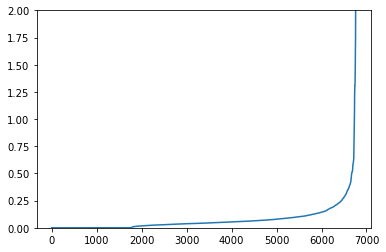

In [33]:
# Sort Distances by asending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.ylim([0,2])
plt.plot(distances)
plt.show()

#### Filter for congressman who have outliers  

purchase or Purchase and 20_day_change is positve

In [34]:
# Grab the outliers for DBSCAN
db_pred_index = np.where(y_pred==-1)

In [35]:
pd.set_option("display.max_rows", 100)
df_outliers = df.iloc[db_pred_index]
df_outliers = df_outliers.drop(columns = ['Unnamed: 0'], axis = 1)
df_outliers.head(10)

,name,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
34,Hon. Donald Sternoff Beyer,joint,sale_full,"$15,001 - $50,000",NTLA,2022-02-28,-37.996963,-28.528070,-36.267070
129,Thomas H Tuberville,Joint,Sale (Partial),"$50,001 - $100,000",OXY,2022-02-22,44.519842,59.461096,51.168915
254,Thomas H Tuberville,Joint,Sale (Full),"$1,001 - $15,000",X,2022-02-10,0.536524,37.432936,57.655809
256,Thomas H Tuberville,Joint,Sale (Full),"$1,001 - $15,000",X,2022-02-10,0.536524,37.432936,57.655809
264,Thomas H Tuberville,Joint,Sale (Full),"$1,001 - $15,000",X,2022-02-10,0.536524,37.432936,57.655809
266,Thomas H Tuberville,Joint,Purchase,"$100,001 - $250,000",X,2022-02-10,0.536524,37.432936,57.655809
284,Hon. Josh Gottheimer,joint,purchase,"$1,001 - $15,000",ENPH,2022-02-09,-21.823462,11.106304,17.481008
654,Hon. Andrew Garbarino,NaN,purchase,"$1,001 - $15,000",TELL,2022-01-14,-26.415099,-17.295596,19.811316
870,Thomas H Tuberville,Joint,Purchase,"$1,001 - $15,000",CLF,2021-12-23,14.834885,-16.313461,-6.998521
1374,Hon. James E Hon Banks,NaN,purchase,"$15,001 - $50,000",RBLX,2021-11-02,35.770829,58.436995,35.280818


Number of outliers

In [36]:
len(df_outliers)

100

Group by congressman and count

In [37]:
# Group by congressman and the count

df_count = df_outliers.groupby('name').count()
df_count.head(10)

,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
name,,,,,,,,
Hon. Alan S. Lowenthal,6,6,6,6,6,6,6,6
Hon. Andrew Garbarino,0,1,1,1,1,1,1,1
Hon. Austin Scott,7,13,13,13,13,13,13,13
Hon. Bob Gibbs,0,1,1,1,1,1,1,1
Hon. Brian Mast,1,9,9,9,9,9,9,9
"Hon. Charles J. ""Chuck"" Fleischmann",1,1,1,1,1,1,1,1
Hon. Christopher L. Jacobs,1,2,2,2,2,2,2,2
Hon. Donald Sternoff Beyer,3,3,3,3,3,3,3,3
Hon. Earl Blumenauer,4,4,4,4,4,4,4,4


In [38]:
# purchase or Purchase and 20_day_change is positve
df_buy_positive = df_outliers.loc[((df_outliers['transaction'] == 'purchase') |
                                       (df_outliers['transaction'] == 'Purchase')) & 
                                       (df_outliers['20_day_change'] > 0)]
 
df_buy_positive = df_buy_positive.sort_values(by=['name','Date'], ascending='False')     

df_buy_positive


,name,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
5997,Hon. Austin Scott,self,purchase,"$1,001 - $15,000",BLDP,2020-12-07,9.006691,18.785381,81.471939
2152,Hon. Austin Scott,NaN,purchase,"$1,001 - $15,000",KPLT,2021-08-13,2.089557,92.537313,75.223882
5764,Hon. Brian Mast,NaN,purchase,"$15,001 - $50,000",IPWR,2020-12-24,-17.979796,109.494955,109.090925
4151,Hon. Brian Mast,NaN,purchase,"$1,001 - $15,000",AMTX,2021-03-04,37.608692,77.681160,48.623188
4152,Hon. Brian Mast,NaN,purchase,"$15,001 - $50,000",AMTX,2021-03-04,37.608692,77.681160,48.623188
4153,Hon. Brian Mast,NaN,purchase,"$1,001 - $15,000",AMTX,2021-03-04,37.608692,77.681160,48.623188
4163,Hon. Brian Mast,NaN,purchase,"$1,001 - $15,000",AMTX,2021-03-04,37.608692,77.681160,48.623188
3343,"Hon. Charles J. ""Chuck"" Fleischmann",joint,purchase,"$1,001 - $15,000",IAU,2021-04-22,100.235300,4.823528,4.823528
5756,Hon. Christopher L. Jacobs,NaN,purchase,"$1,001 - $15,000",SRNE,2020-12-28,-3.489930,39.865776,116.375856
6351,Hon. Donald Sternoff Beyer,joint,purchase,"$1,001 - $15,000",EDIT,2020-11-17,10.956520,125.843479,166.086957


In [39]:
df_buy_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 5997 to 6199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           41 non-null     object 
 1   owner          26 non-null     object 
 2   transaction    41 non-null     object 
 3   amount_invest  41 non-null     object 
 4   ticker         41 non-null     object 
 5   Date           41 non-null     object 
 6   10_day_change  41 non-null     float64
 7   20_day_change  41 non-null     float64
 8   30_day_change  41 non-null     float64
dtypes: float64(3), object(6)
memory usage: 3.2+ KB


sale_full, Sale(Partial), sale_partial or Sale (Full) and 20_day_change negative

In [40]:
df_sell_negative = df_outliers.loc[((df_outliers['transaction'] == 'sale_full') |
                                        (df_outliers['transaction'] == 'sale_partial') |
                                        (df_outliers['transaction'] == 'Sale (Full)') |
                                        (df_outliers['transaction'] == 'Sale (Partial)')) &
                                       (df_outliers['20_day_change'] < 0)]

df_sell_negative = df_sell_negative.sort_values(by=['name','Date'], ascending='False')

df_sell_negative
                                       

,name,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
5193,Hon. Alan S. Lowenthal,self,sale_partial,"$1,001 -",SPCE,2021-01-27,22.373254,-0.496223,-34.002155
5200,Hon. Alan S. Lowenthal,self,sale_partial,"$1,001 - $15,000",SPCE,2021-01-27,22.373254,-0.496223,-34.002155
5047,Hon. Alan S. Lowenthal,self,sale_full,"$1,001 - $15,000",SPCE,2021-02-04,-10.836989,-44.627196,-41.593570
4915,Hon. Brian Mast,NaN,sale_partial,"$15,001 - $50,000",TLRY,2021-02-09,-41.463986,-42.361273,-45.171192
4916,Hon. Brian Mast,NaN,sale_partial,"$15,001 - $50,000",TLRY,2021-02-09,-41.463986,-42.361273,-45.171192
34,Hon. Donald Sternoff Beyer,joint,sale_full,"$15,001 - $50,000",NTLA,2022-02-28,-37.996963,-28.528070,-36.267070
5188,Hon. Garret Graves,NaN,sale_full,"$1,001 - $15,000",DDD,2021-01-27,31.067959,-11.342650,-37.224721
6502,Hon. Greg Gianforte,joint,sale_partial,"$1,001 - $15,000",RYCEY,2020-11-13,7.324834,-47.133761,-45.541402
6361,Hon. Kenny Marchant,joint,sale_full,"$1,001 - $15,000",AHT,2020-11-17,-52.584269,-16.853933,-41.573034
5038,Hon. Marie Newman,self,sale_full,"$1,001 - $15,000",VRM,2021-02-04,13.176858,-26.539620,-16.430397


In [41]:
df_sell_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 5193 to 4730
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           14 non-null     object 
 1   owner          11 non-null     object 
 2   transaction    14 non-null     object 
 3   amount_invest  14 non-null     object 
 4   ticker         14 non-null     object 
 5   Date           14 non-null     object 
 6   10_day_change  14 non-null     float64
 7   20_day_change  14 non-null     float64
 8   30_day_change  14 non-null     float64
dtypes: float64(3), object(6)
memory usage: 1.1+ KB


#### purchase or Purchase and 20_day_change is negative

In [42]:
# purchase or Purchase and 20_day_change is positve
df_buy_negative = df_outliers.loc[((df_outliers['transaction'] == 'purchase') |
                                       (df_outliers['transaction'] == 'Purchase')) & 
                                       (df_outliers['20_day_change'] < 0)]
    
df_buy_negative.head(5)


,name,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
654,Hon. Andrew Garbarino,NaN,purchase,"$1,001 - $15,000",TELL,2022-01-14,-26.415099,-17.295596,19.811316
870,Thomas H Tuberville,Joint,Purchase,"$1,001 - $15,000",CLF,2021-12-23,14.834885,-16.313461,-6.998521
2463,Hon. Austin Scott,NaN,purchase,"$1,001 - $15,000",KPLT,2021-07-16,-6.145254,-58.212290,-61.787708
2505,Hon. Austin Scott,NaN,purchase,"$1,001 - $15,000",KPLT,2021-07-08,-9.046687,-12.937743,-67.412451
2547,Hon. Ed Case,NaN,purchase,"$1,001 - $15,000",MRIN,2021-07-02,-56.727455,-59.191723,-74.470184


In [43]:
df_buy_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 654 to 5191
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12 non-null     object 
 1   owner          3 non-null      object 
 2   transaction    12 non-null     object 
 3   amount_invest  12 non-null     object 
 4   ticker         12 non-null     object 
 5   Date           12 non-null     object 
 6   10_day_change  12 non-null     float64
 7   20_day_change  12 non-null     float64
 8   30_day_change  12 non-null     float64
dtypes: float64(3), object(6)
memory usage: 960.0+ bytes


#### sale_full, Sale(Partial), sale_partial or Sale (Full) and 20_day_change positive

In [44]:
df_sell_positive = df_outliers.loc[((df_outliers['transaction'] == 'sale_full') |
                                        (df_outliers['transaction'] == 'sale_partial') |
                                        (df_outliers['transaction'] == 'Sale (Full)') |
                                        (df_outliers['transaction'] == 'Sale (Partial)')) &
                                       (df_outliers['20_day_change'] > 0)]

df_sell_positive.head(5)

,name,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
129,Thomas H Tuberville,Joint,Sale (Partial),"$50,001 - $100,000",OXY,2022-02-22,44.519842,59.461096,51.168915
254,Thomas H Tuberville,Joint,Sale (Full),"$1,001 - $15,000",X,2022-02-10,0.536524,37.432936,57.655809
256,Thomas H Tuberville,Joint,Sale (Full),"$1,001 - $15,000",X,2022-02-10,0.536524,37.432936,57.655809
264,Thomas H Tuberville,Joint,Sale (Full),"$1,001 - $15,000",X,2022-02-10,0.536524,37.432936,57.655809
1454,Hon. James E Hon Banks,NaN,sale_full,"$15,001 - $50,000",RBLX,2021-10-26,-4.808999,48.621587,43.392260


In [45]:
df_sell_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 129 to 6696
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           33 non-null     object 
 1   owner          27 non-null     object 
 2   transaction    33 non-null     object 
 3   amount_invest  33 non-null     object 
 4   ticker         33 non-null     object 
 5   Date           33 non-null     object 
 6   10_day_change  33 non-null     float64
 7   20_day_change  33 non-null     float64
 8   30_day_change  33 non-null     float64
dtypes: float64(3), object(6)
memory usage: 2.6+ KB


#### Pie Chart outliers by type

In [46]:
categories = ['buy/positive', 'sell/negative', 'buy/negative', 'sell/positive']
values = [len(df_buy_positive), len(df_sell_negative), len(df_buy_negative), len(df_sell_positive)]

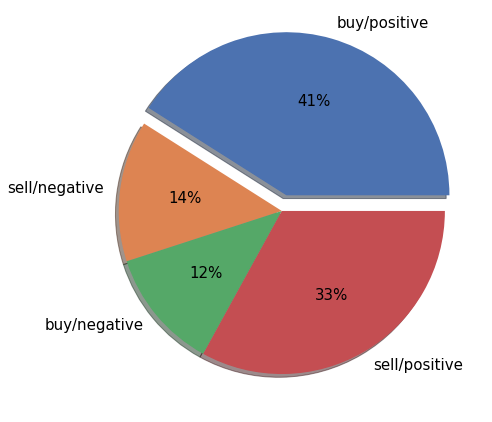

In [47]:
# Create pie chart

fig = plt.figure(figsize = (7.5, 7.5))

# Exploding pie
explode = [0.1, 0, 0, 0]
# Color
palette_color = sns.color_palette('deep')
# Text Size
textprops = {'fontsize':15}


# Plot the chart
plt.pie(values, labels=categories, colors = palette_color, 
        explode=explode, autopct='%.0f%%', shadow = True, 
       textprops=textprops)

plt.show()


#### Create Word Cloud for outlier types

#### All outliers

In [48]:
# Create dictionary with the words and frequencies

lst_names = df_count.index.values.tolist()
lst_transactions = df_count.loc[:, 'transaction'].tolist()

congress_dict = dict(zip(lst_names, lst_transactions))

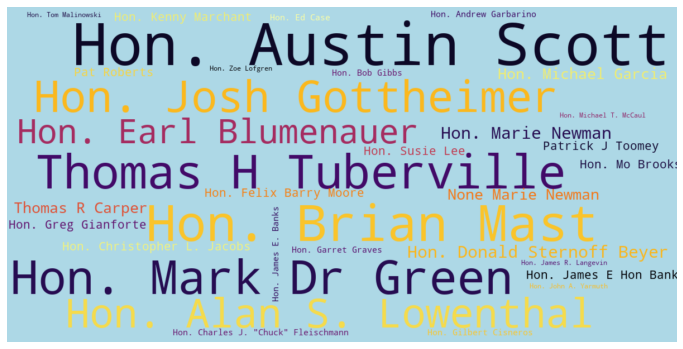

In [49]:
# Create the wordcloud
wordcloud = WordCloud(scale = 3, background_color = 'lightblue', min_font_size = 2,
                     colormap = 'inferno')
wordcloud.generate_from_frequencies(frequencies=congress_dict)

plt.figure(figsize=[12, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Word Cloud buy/positive

In [50]:
df_count_buy_positive = df_buy_positive.groupby('name').count()
df_count_buy_positive = df_count_buy_positive.sort_values(by='transaction', ascending=False)
df_count_buy_positive

,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
name,,,,,,,,
Hon. Mark Dr Green,4,6,6,6,6,6,6,6
Hon. Brian Mast,0,5,5,5,5,5,5,5
Hon. Earl Blumenauer,4,4,4,4,4,4,4,4
Hon. Josh Gottheimer,3,3,3,3,3,3,3,3
Pat Roberts,2,2,2,2,2,2,2,2
Hon. Susie Lee,2,2,2,2,2,2,2,2
Hon. Michael Garcia,0,2,2,2,2,2,2,2
Hon. Austin Scott,1,2,2,2,2,2,2,2
Hon. Donald Sternoff Beyer,2,2,2,2,2,2,2,2


In [66]:
len(df_count_buy_positive)

21

In [51]:
# Create Dictionary
lst_names1 = df_count_buy_positive.index.values.tolist()
lst_transactions1 = df_count_buy_positive.loc[:, 'transaction'].tolist()

congress_dict1 = dict(zip(lst_names, lst_transactions))

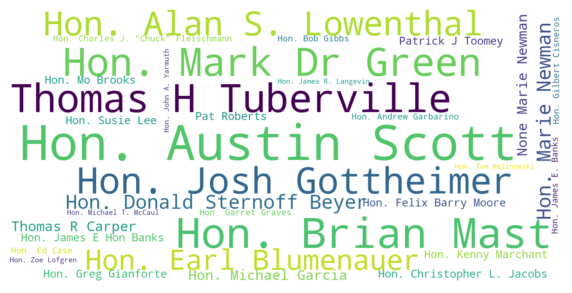

In [52]:
# Create the wordcloud

wordcloud = WordCloud(scale = 3, background_color="white", min_font_size = 5,
                     collocations=False, colormap = 'viridis')
wordcloud.generate_from_frequencies(frequencies=congress_dict1)
plt.figure(figsize = [10,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Word Cloud sell/negative

In [53]:
df_count_sell_negative = df_sell_negative.groupby('name').count()
df_count_sell_negative = df_count_sell_negative.sort_values(by='transaction', ascending=False)
df_count_sell_negative

,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
name,,,,,,,,
Hon. Alan S. Lowenthal,3,3,3,3,3,3,3,3
Hon. Brian Mast,0,2,2,2,2,2,2,2
Thomas H Tuberville,2,2,2,2,2,2,2,2
Hon. Donald Sternoff Beyer,1,1,1,1,1,1,1,1
Hon. Garret Graves,0,1,1,1,1,1,1,1
Hon. Greg Gianforte,1,1,1,1,1,1,1,1
Hon. Kenny Marchant,1,1,1,1,1,1,1,1
Hon. Marie Newman,1,1,1,1,1,1,1,1
Patrick J Toomey,1,1,1,1,1,1,1,1


In [67]:
len(df_count_sell_negative)

10

In [54]:
# Create Dictionary
lst_names2 = df_count_sell_negative.index.values.tolist()
lst_transactions2 = df_count_sell_negative.loc[:, 'transaction'].tolist()

congress_dict2 = dict(zip(lst_names2, lst_transactions2))

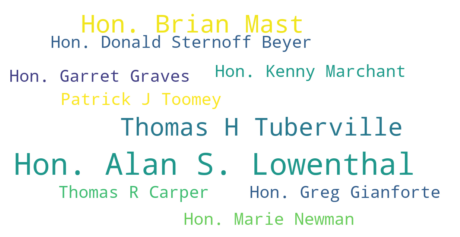

In [55]:
# Create the wordcloud
wordcloud = WordCloud(scale=3, background_color="white", min_font_size = 5,
                     collocations=False)
wordcloud.generate_from_frequencies(frequencies=congress_dict2)
plt.figure(figsize = [8,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Word Cloud buy/negative

In [56]:
df_count_buy_negative = df_buy_negative.groupby('name').count()
df_count_buy_negative = df_count_buy_negative.sort_values(by = 'transaction', ascending=False)
df_count_buy_negative

,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
name,,,,,,,,
Hon. Austin Scott,0,2,2,2,2,2,2,2
Hon. Felix Barry Moore,0,2,2,2,2,2,2,2
Hon. Mark Dr Green,1,2,2,2,2,2,2,2
Hon. Andrew Garbarino,0,1,1,1,1,1,1,1
Hon. Bob Gibbs,0,1,1,1,1,1,1,1
Hon. Brian Mast,0,1,1,1,1,1,1,1
Hon. Ed Case,0,1,1,1,1,1,1,1
Patrick J Toomey,1,1,1,1,1,1,1,1
Thomas H Tuberville,1,1,1,1,1,1,1,1


In [57]:
# Create Dictionary
lst_names3 = df_count_buy_negative.index.values.tolist()
lst_transactions3 = df_count_buy_negative.loc[:, 'transaction'].tolist()

congress_dict3 = dict(zip(lst_names3, lst_transactions3))

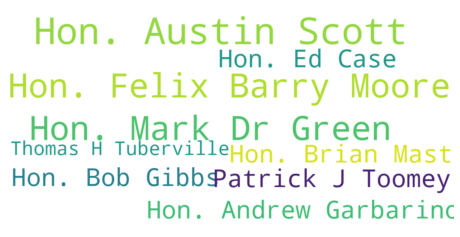

In [58]:
# Create the wordcloud
wordcloud = WordCloud(scale=3, background_color="white", min_font_size = 5,
                     collocations=False)
wordcloud.generate_from_frequencies(frequencies=congress_dict3)
plt.figure(figsize = [8,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Word Cloud sell/positive

In [59]:
df_count_sell_positive = df_sell_positive.groupby('name').count()
df_count_sell_positive

,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
name,,,,,,,,
Hon. Alan S. Lowenthal,3,3,3,3,3,3,3,3
Hon. Austin Scott,6,9,9,9,9,9,9,9
Hon. Brian Mast,1,1,1,1,1,1,1,1
Hon. Christopher L. Jacobs,1,1,1,1,1,1,1,1
Hon. Gilbert Cisneros,0,1,1,1,1,1,1,1
Hon. Greg Gianforte,1,1,1,1,1,1,1,1
Hon. James E Hon Banks,0,1,1,1,1,1,1,1
Hon. Josh Gottheimer,4,4,4,4,4,4,4,4
Hon. Kenny Marchant,1,1,1,1,1,1,1,1


In [60]:
# Create Dictionary
lst_names4 = df_count_sell_positive.index.values.tolist()
lst_transactions4 = df_count_sell_positive.loc[:, 'transaction'].tolist()

congress_dict4 = dict(zip(lst_names4, lst_transactions4))

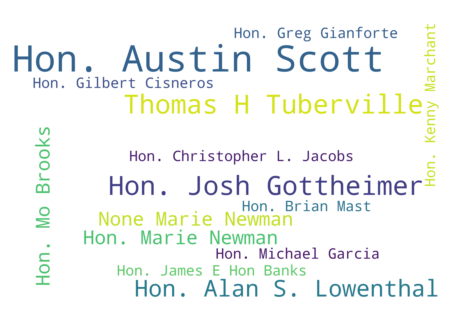

In [61]:
# Create the wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, background_color="white", min_font_size = 5,
                     collocations=False)
wordcloud.generate_from_frequencies(frequencies=congress_dict4)
plt.figure(figsize = [8,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [70]:
# Send dataframes to csv

df_buy_positive.to_csv('buy_positives.csv')
df_sell_negative.to_csv('sell_negatives.csv')
df_buy_negative.to_csv('buy_negatives.csv')
df_sell_positive.to_csv('sell_positives.csv')